# Visualization

Visualizing results

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5,1,'Simplest errorbars, 0.2 in x, 0.4 in y')

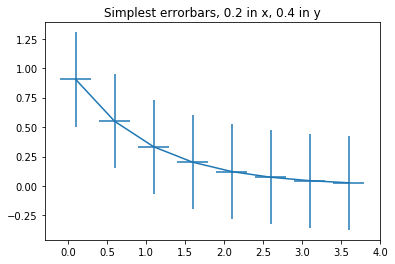

In [2]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

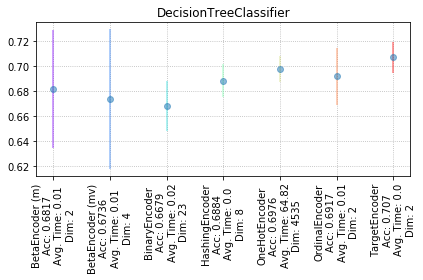

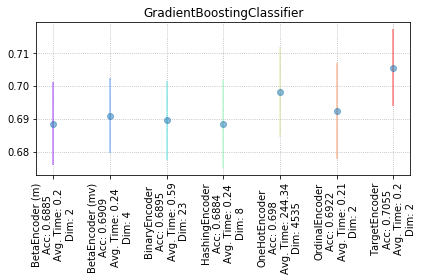

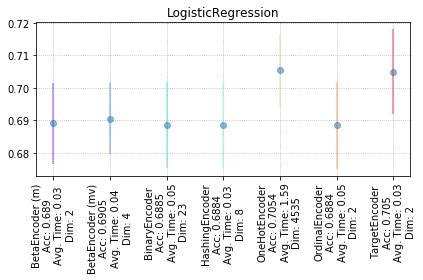

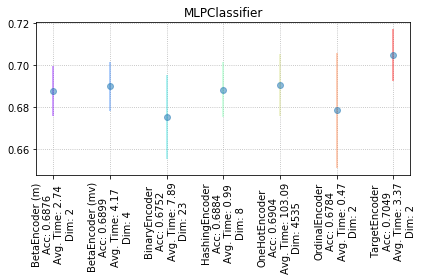

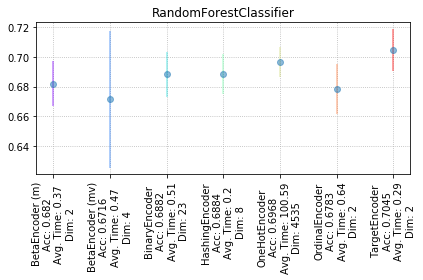

In [3]:
import pandas as pd
import matplotlib.cm as cm

def plot_experiment(plot_title='Road Safety',experiment_file='official_road_safety_experiments.csv'):
    #Plotting Adult
    adult = pd.read_csv(experiment_file)
    adult.model = adult.model.str.split('.',expand=True)[3].str.replace("'>","")
    adult = adult.sort_values(by=['model','Encoder']).reset_index(drop=True)
    adult['Training Time'] = adult['Training Time'].round(2)
    adult['description'] = adult.Encoder + \
            '\nAcc: ' + adult['Accuracy'].round(4).astype(str) +\
            '\nAvg. Time: ' + adult['Training Time'].astype(str) + \
            '\nDim: ' + adult['Dimensions'].astype(str)

    for m in list(adult.model.unique()):
        temp = adult[adult.model==m]
        title = m

        x = temp.description
        y = temp.Accuracy

        colors = cm.rainbow(np.linspace(0, 1, len(temp.Accuracy)))
        yerr = temp.Std
        plt.figure()
        #plt.scatter(x, y, alpha=0.5,c=colors,yerr=yerr)
        plt.errorbar(x, y, alpha=0.5,
                yerr=yerr, fmt='o',
                ecolor=colors)
        plt.xticks(rotation=90)
        plt.title(title)
        plt.tight_layout()
        plt.grid(linestyle='dotted')
        plt.savefig(plot_title+'_'+title+'.png')
        plt.show()
plot_experiment()

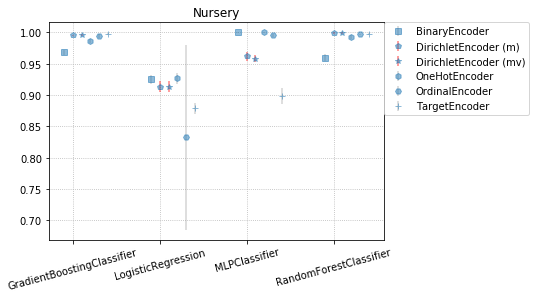

In [28]:
from matplotlib.lines import Line2D
# # set width of bar
# barWidth = 0.25
 
# # set height of bar
# bars1 = [12, 30, 1, 8, 22]
# bars2 = [28, 6, 16, 5, 10]
# bars3 = [29, 3, 24, 25, 17]
 
# # Set position of bar on X axis
# r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# # Make the plot
# plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
# plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
# plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# # Add xticks on the middle of the group bars
# plt.xlabel('group', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# # Create legend & Show graphic
# plt.legend()
# plt.show()


'''Grouped Error Chart

model = group
encoder = color
'''
def plot_experiment(plot_title='Road Safety',experiment_file='exp1_road_safety_experiments.csv',measure='Accuracy'):
    
    
    #Plotting Adult DF
    adult = pd.read_csv(experiment_file)
    adult.model = adult.model.str.split('.',expand=True)[3].str.replace("'>","")
    adult = adult.sort_values(by=['model','Encoder']).reset_index(drop=True)
    adult['Training Time'] = adult['Training Time'].round(2)
    adult['description'] = adult.Encoder + \
            '\nAcc: ' + adult[measure].round(4).astype(str) +\
            '\nAvg. Time: ' + adult['Training Time'].astype(str) + \
            '\nDim: ' + adult['Dimensions'].astype(str)
    if measure != 'Accuracy':
        adult = adult[~adult.model.str.contains('MLP')]
    #markers

    markers = []
    marker_i = 11
    for m in Line2D.markers:
        try:
            if len(m) == 1 and m != ' ':
                markers.append(m)
        except TypeError:
            pass
    # set width of bar, this will be our 'x'
    barWidth = 0.1
    r = list()
    for encoder in list(adult.Encoder.unique()):
        temp = adult[adult.Encoder==encoder]
        if 'shing' in encoder:
            continue
        
        
        if len(r) == 0:
            r = np.arange(len(temp))
        else:
            r = [x + barWidth for x in r]
        y = temp[measure]
        models = list(temp.model.unique())

        color = '#A9A9A9'
        marker_i+=1
        fmt = markers[marker_i]
        extensionsToCheck = ['Beta', 'Diri', 'GIG']
        if any(ext in encoder for ext in extensionsToCheck):
            color = '#ff0000'
        if measure != 'Accuracy':
            yerr = temp.STD
        else:
            yerr = temp.Std
        #plt.figure()
        #plt.scatter(x, y, alpha=0.5,c=colors,yerr=yerr)
        plt.errorbar(r, y, alpha=0.5,
                yerr=yerr, fmt=fmt,
                ecolor=color, label=encoder)
    plt.xticks([r + barWidth for r in range(len(temp))], models, rotation=15)
    plt.title(plot_title)
    #plt.tight_layout()
    plt.grid(linestyle='dotted')
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.savefig(plot_title+'_Official'+'.png', bbox_inches='tight')
    plt.show()
#exp1_insurance_experiments
#plot_experiment(plot_title='Insurance',experiment_file='exp1_insurance_experiments.csv',measure='R2')
#plot_experiment(plot_title='Road Safety',experiment_file='exp1_road_safety_experiments.csv',measure='Accuracy')
plot_experiment(plot_title='Nursery',experiment_file='exp1_nursery_experiments.csv',measure='Accuracy')

In [30]:
# This doesn't work
# plt.subplot(1, 2, 1)
# plot_experiment(plot_title='Insurance',experiment_file='exp1_insurance_experiments.csv',measure='R2')

# plt.subplot(1, 2,2)
# plot_experiment(plot_title='Bike Sharing',experiment_file='exp1_bike_sharing_experiments.csv',measure='R2')

# #plt.tight_layout()
# plt.show()

# Dimensionality with Size

In [35]:
pet_dims = pd.read_csv('pet_finder_dim_experiments.csv')
lead_dims = pd.read_csv('lead_scoring_dim_experiments.csv')
road_safety = pd.read_csv('road_safety_raw.csv')

In [40]:

samples = [2000,4000,8000]
dims = []
for size in samples:
    rs = road_safety.sample(size)
    dims.append(len(rs.make.unique()) + len(rs.model.unique()))
rs_dims = pd.DataFrame({'Sample Size':samples, 'Dimensions':dims})

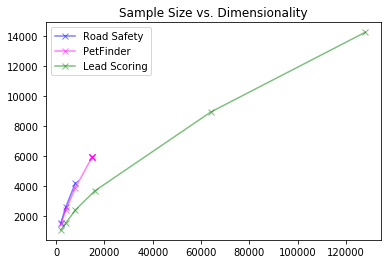

In [63]:
rs_dims#, lead_dims

plt.plot( 'Sample Size', 'Dimensions', data=rs_dims, marker='x', 
         color='blue', alpha=.5, label='Road Safety')
plt.plot( 'Sample Size', 'Dimensions', data=pet_dims, marker='x',
         color='magenta',alpha=.5, label='PetFinder')
plt.plot( 'Sample Size', 'Dimensions', data=lead_dims, marker='x', 
         color='green',alpha=.5,label='Lead Scoring')
plt.legend()
plt.title('Sample Size vs. Dimensionality')
plt.savefig('Dims_Official'+'.png', bbox_inches='tight')
plt.show()


# Experiment 1 Other stats

In [41]:
n = pd.read_csv('exp1_nursery_experiments.csv')
c = pd.read_csv('exp1_car_experiments.csv')
a = pd.read_csv('exp1_adult_experiments.csv')
r = pd.read_csv('exp1_road_safety_experiments.csv')
b = pd.read_csv('exp1_bike_sharing_experiments.csv')
i = pd.read_csv('exp1_insurance_experiments.csv')

binary = pd.concat([a,r])
binary = binary[~binary.Encoder.str.contains('Hash')]
binary,binary[['Encoder','model','Training Time']].groupby('model')['Training Time'].rank()

multi = pd.concat([n,c])
multi = multi[~multi.Encoder.str.contains('Hash')]
multi[['Encoder','Training Time']].groupby('Encoder').mean()

reg = pd.concat([b,i])
reg = reg[~reg.model.str.contains('multi')]
reg = reg[~reg.Encoder.str.contains('Hash')]
reg[['Encoder','Training Time']].groupby('Encoder').mean()

#df['Auction_Rank'] = df.groupby('Auction_ID')['Bid_Price'].rank(ascending=False)

,Training Time
Encoder,
BinaryEncoder,1.243791
GIGEncoder (m),1.518574
GIGEncoder (mv),2.444126
OneHotEncoder,19.565347
OrdinalEncoder,1.041376
TargetEncoder,1.060812


In [28]:
binary = pd.concat([a,r])
binary[['Encoder','Accuracy']].groupby('Encoder').mean()

multi = pd.concat([n,c])
multi = multi[~multi.Encoder.str.contains('Hash')]
multi[['Encoder','Accuracy']].groupby('Encoder').mean()

reg = pd.concat([b,i])
reg = reg[~reg.model.str.contains('multi')]
reg = reg[~reg.Encoder.str.contains('Hash')]
reg[['Encoder','R2']].groupby('Encoder').mean()

,R2
Encoder,
BinaryEncoder,0.770154
GIGEncoder (m),0.821108
GIGEncoder (mv),0.821310
OneHotEncoder,0.808305
OrdinalEncoder,0.772254
TargetEncoder,0.772255
